<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/LS_DS_423_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [10]:
%pwd

'/content'

In [1]:
##### Your Code Here #####
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

So the the number of input neurons equal to input attributes is 13

In [0]:
# Normalize the data (all features should have roughly the same scale)
from sklearn.preprocessing import Normalizer

norm= Normalizer()

X_train= norm.transform(X_train)
X_test= norm.transform(X_test)


In [15]:
X_train

array([[2.41189924e-03, 0.00000000e+00, 1.59296858e-02, ...,
        4.10962409e-02, 7.76718953e-01, 3.66343633e-02],
       [4.07923050e-05, 1.54587284e-01, 3.80378407e-03, ...,
        2.75446433e-02, 7.40857215e-01, 5.82747215e-03],
       [6.34505528e-03, 0.00000000e+00, 2.34463745e-02, ...,
        2.61666721e-02, 4.86441025e-01, 4.22293817e-03],
       ...,
       [7.29281484e-05, 7.36435428e-02, 1.27508534e-02, ...,
        3.55593107e-02, 7.62210668e-01, 1.64751126e-02],
       [4.37205159e-03, 0.00000000e+00, 3.98313637e-02, ...,
        2.99040371e-02, 5.32881804e-01, 3.21214113e-02],
       [3.09311543e-05, 1.28969372e-01, 6.29800433e-03, ...,
        3.35320367e-02, 8.09712706e-01, 9.41476414e-03]])

In [0]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

1.Import the type of model and layers that you will need from Keras.

2. Instantiate a model object and use model.add() to add layers to your model

3. Since this is a regression model you will have a single output node in the final layer.

4. Use activation functions that are appropriate for this task
Compile your model.

5. Fit your model and report its accuracy in terms of Mean Squared Error

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()

model.add(Flatten(input_shape=(13,)))
model.add(Dense(15, activation='relu'))
model.add(Dense(1))
#Dense(1, activation="relu")
                    
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

model.fit(X_train, y_train, epochs=200, validation_data=(X_test,y_test))

Epoch 1/200
13/13 [==============================] - 0s 14ms/step - loss: 598.3846 - mse: 598.3846 - val_loss: 624.8157 - val_mse: 624.8157
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 591.9205 - mse: 591.9205 - val_loss: 618.2950 - val_mse: 618.2950
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 585.7060 - mse: 585.7060 - val_loss: 611.8410 - val_mse: 611.8410
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 579.4018 - mse: 579.4018 - val_loss: 605.2594 - val_mse: 605.2594
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 572.7503 - mse: 572.7503 - val_loss: 598.2302 - val_mse: 598.2302
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 565.6554 - mse: 565.6554 - val_loss: 590.4777 - val_mse: 590.4777
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 557.8536 - mse: 557.8536 - val_loss: 582.4479 - val_mse: 582.4479
Epoch 8/200
13/13 [=======

Use the history object that is returned from model.

fit to make graphs of the model's loss or train/validation accuracies by epoch.

Run this same data through a linear regression model. Which achieves higher accuracy?

Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)

After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
#from keras.callbacks import History 
#history = History()

In [0]:
#model.fit(X_train, y_train, nb_epoch=4)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([Flatten(input_shape=(13,)),
    Dense(15, activation="relu"),
    Dense(1, activation="relu")
])
                    
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

model.fit(X_train, y_train, epochs=200, validation_data=(X_test,y_test))

Epoch 1/200
13/13 [==============================] - 0s 9ms/step - loss: 576.4895 - mse: 576.4895 - val_loss: 602.5540 - val_mse: 602.5540
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 570.7158 - mse: 570.7158 - val_loss: 596.6092 - val_mse: 596.6092
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 564.9441 - mse: 564.9441 - val_loss: 590.2958 - val_mse: 590.2958
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 558.6349 - mse: 558.6349 - val_loss: 583.5803 - val_mse: 583.5803
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 551.8273 - mse: 551.8273 - val_loss: 575.8767 - val_mse: 575.8767
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 543.9373 - mse: 543.9373 - val_loss: 567.3246 - val_mse: 567.3246
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 535.3353 - mse: 535.3353 - val_loss: 558.3002 - val_mse: 558.3002
Epoch 8/200
13/13 [========

In [0]:
#model.fit(X_train, Y_train, nb_epoch=5, batch_size=16, callbacks=[history])

In [15]:
print (model.history.history)



{'loss': [576.489501953125, 570.7158203125, 564.944091796875, 558.6349487304688, 551.8272705078125, 543.9373168945312, 535.3352661132812, 526.336669921875, 516.7913818359375, 506.69268798828125, 496.17486572265625, 485.0501708984375, 473.53350830078125, 461.6184387207031, 449.2229309082031, 436.6063232421875, 423.7530212402344, 410.62298583984375, 397.0840148925781, 383.6826171875, 370.008544921875, 356.3598327636719, 342.68994140625, 329.0374755859375, 315.4959716796875, 302.0581359863281, 289.0492858886719, 276.0613098144531, 263.3433837890625, 251.26324462890625, 239.08071899414062, 227.66188049316406, 216.4549560546875, 205.7515106201172, 195.51455688476562, 185.7738037109375, 176.58045959472656, 167.75404357910156, 159.58062744140625, 151.6918487548828, 144.5904083251953, 138.01376342773438, 131.66033935546875, 126.04046630859375, 120.8373794555664, 116.04557037353516, 111.93374633789062, 107.87242889404297, 104.34547424316406, 101.3440170288086, 98.47696685791016, 96.018165588378

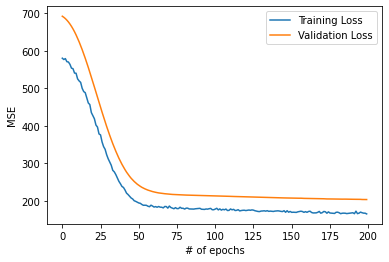

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(hist['loss'], label='Training Loss')
plt.plot(hist['val_loss'], label='Validation Loss')
# plt.xticks(np.arange(0, 5), ('1','2','3','4','5'))
plt.xlabel('# of epochs')
plt.ylabel('MSE')
plt.legend();

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()


model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)

(22.77423909605731, 18.16551049349646)

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [21]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#using one-hot vector to fit the model
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
X_train.shape, X_train[0].shape

((60000, 28, 28), (28, 28))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(784, activation="relu"),
    Dense(784, activation="relu"),
    Dense(784, activation="relu"),
    Dense(10, activation="softmax")
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train, 
        y=y_train, 
        epochs=15, 
        validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 36s 19ms/step - loss: 1.6254 - accuracy: 0.7897 - val_loss: 0.4789 - val_accuracy: 0.8295
Epoch 2/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4458 - accuracy: 0.8402 - val_loss: 0.5081 - val_accuracy: 0.8156
Epoch 3/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4118 - accuracy: 0.8545 - val_loss: 0.4612 - val_accuracy: 0.8419
Epoch 4/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3994 - accuracy: 0.8582 - val_loss: 0.4170 - val_accuracy: 0.8541
Epoch 5/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3855 - accuracy: 0.8643 - val_loss: 0.4459 - val_accuracy: 0.8517
Epoch 6/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3653 - accuracy: 0.8686 - val_loss: 0.4013 - val_accuracy: 0.8643
Epoch 7/15
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3522 - accuracy: 0.8769 - val_loss: 0.4564 -

In [0]:
hist1 = model.history.history

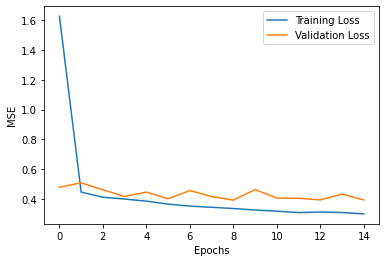

In [0]:
plt.plot(hist1['loss'], label='Training Loss')
plt.plot(hist1['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend();

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.